In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [3]:
df = pd.read_csv("data/df_preprocessed_log_dummies.csv")

In [4]:
df.head()

,state,delta_dead_laun,launch_day,launch_hour,name_len,blurb_len,goal_usd_log,AU,BE,CA,...,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
0,1,720.0,3,19,23,125,6.907755,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,720.0,0,7,51,108,9.615805,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1439.0,3,19,34,133,9.479141,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,720.0,0,21,40,121,7.937375,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,720.0,3,4,31,134,8.160518,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
# define features and target
X = df.drop('state', axis=1)
y = df['state']

In [6]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [7]:
def train(X_train, y_train, X_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    return y_pred, y_pred_train

In [8]:
def evaluate(y_true, y_pred, y_train, y_pred_train):
    print(classification_report(y_train, y_pred_train))
    print(classification_report(y_true, y_pred))
    cm_test = confusion_matrix(y_true, y_pred, normalize=None)
    cm_train = confusion_matrix(y_train, y_pred_train, normalize=None)
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    sns.heatmap(cm_train, annot=True, fmt='g', ax=ax1)
    sns.heatmap(cm_test, annot=True, fmt='g', ax=ax2)
    ax1.title.set_text('Train')
    ax2.title.set_text('Test')

In [128]:
# train DecistionTree
tree = DecisionTreeClassifier()
y_pred_tree, y_pred_tree_train = train(X_train, y_train, X_test, tree)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52770
           1       1.00      1.00      1.00     82093

    accuracy                           1.00    134863
   macro avg       1.00      1.00      1.00    134863
weighted avg       1.00      1.00      1.00    134863

              precision    recall  f1-score   support

           0       0.58      0.56      0.57     22427
           1       0.73      0.75      0.74     35372

    accuracy                           0.67     57799
   macro avg       0.66      0.65      0.65     57799
weighted avg       0.67      0.67      0.67     57799



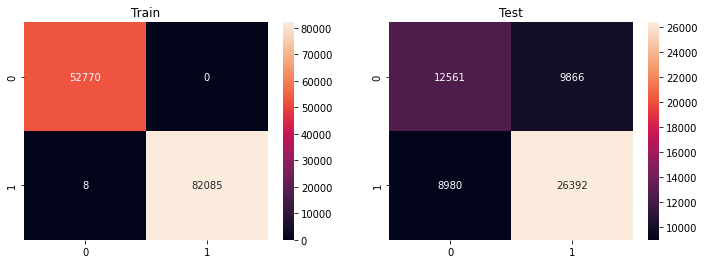

In [158]:
# evaluate tree
evaluate(y_test, y_pred_tree, y_train, y_pred_tree_train)

In [ ]:
# get parameter
print(f'depth: {tree.get_params()}')

In [37]:
f1_score(y_test, y_pred_tree)

0.7375113279888463

In [38]:
roc_auc_score(y_test, y_pred_tree)

0.6530638826982959

In [159]:
# train svm
svm = SVC(max_iter=10000)
y_pred_svm, y_pred_svm_train = train(X_train, y_train, X_test, svm)

/Users/laurenthartmann/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.28      0.10      0.14     22427
           1       0.60      0.84      0.70     35372

    accuracy                           0.55     57799
   macro avg       0.44      0.47      0.42     57799
weighted avg       0.47      0.55      0.48     57799



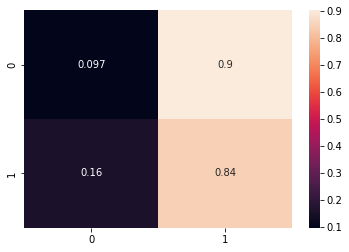

In [61]:
# evaluate svm
evaluate(y_test, y_pred_svm, y_train, y_pred_svm_train)

In [11]:
# train random forest
forest = RandomForestClassifier()
y_pred_forest, y_pred_forest_train = train(X_train, y_train, X_test, forest)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52770
           1       1.00      1.00      1.00     82093

    accuracy                           1.00    134863
   macro avg       1.00      1.00      1.00    134863
weighted avg       1.00      1.00      1.00    134863

              precision    recall  f1-score   support

           0       0.72      0.55      0.63     22427
           1       0.75      0.86      0.80     35372

    accuracy                           0.74     57799
   macro avg       0.74      0.71      0.72     57799
weighted avg       0.74      0.74      0.74     57799



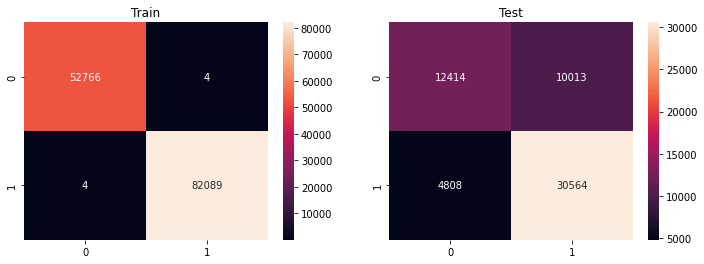

In [12]:
# evaluate random forest
evaluate(y_test, y_pred_forest, y_train, y_pred_forest_train)

In [13]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [30]:
# randomized search with random forest
rs_params = {
    'n_estimators': [100, 200, 500],
    'max_features': [None, 'sqrt'],
    'max_depth': [50, 100, 150],
    'min_samples_split': [50, 100, 200],
    'min_samples_leaf': [50, 100, 200],
    'bootstrap': [True, False]}

rs_forest = RandomizedSearchCV(forest, param_distributions=rs_params, n_jobs=-1, cv=5, scoring='f1', verbose=2, random_state=42)

In [31]:
rs_forest.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=150, max_features=None, min_samples_leaf=200, min_samples_split=200, n_estimators=100; total time= 1.3min
[CV] END bootstrap=True, max_depth=150, max_features=None, min_samples_leaf=200, min_samples_split=200, n_estimators=100; total time= 1.3min
[CV] END bootstrap=True, max_depth=150, max_features=None, min_samples_leaf=200, min_samples_split=200, n_estimators=100; total time= 1.3min
[CV] END bootstrap=True, max_depth=150, max_features=None, min_samples_leaf=200, min_samples_split=200, n_estimators=100; total time= 1.3min
[CV] END bootstrap=True, max_depth=150, max_features=None, min_samples_leaf=200, min_samples_split=200, n_estimators=100; total time= 1.3min
[CV] END bootstrap=True, max_depth=150, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time= 1.6min
[CV] END bootstrap=True, max_depth=150, max_features=None, min_samples_leaf=50, min_samples_spl

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [50, 100, 150],
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': [50, 100, 200],
                                        'min_samples_split': [50, 100, 200],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, scoring='f1', verbose=2)

In [32]:
best_rs = rs_forest.best_estimator_

In [33]:
rs_forest.best_params_

{'n_estimators': 200,
 'min_samples_split': 200,
 'min_samples_leaf': 50,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [34]:
y_pred_rs, y_pred_rs_train = train(X_train, y_train, X_test, best_rs)

              precision    recall  f1-score   support

           0       0.71      0.48      0.57     52770
           1       0.72      0.88      0.79     82093

    accuracy                           0.72    134863
   macro avg       0.72      0.68      0.68    134863
weighted avg       0.72      0.72      0.71    134863

              precision    recall  f1-score   support

           0       0.70      0.47      0.56     22427
           1       0.72      0.87      0.79     35372

    accuracy                           0.72     57799
   macro avg       0.71      0.67      0.68     57799
weighted avg       0.71      0.72      0.70     57799



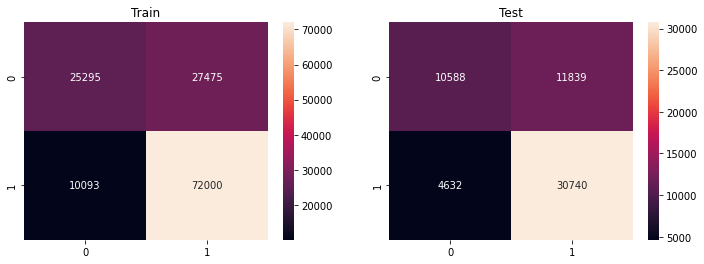

In [35]:
evaluate(y_test, y_pred_rs, y_train, y_pred_rs_train)

In [9]:
# train adjusted forest
forest2 = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=50, min_samples_split= 200, min_samples_leaf= 50)
y_pred_forest2, y_pred_forest2_train = train(X_train, y_train, X_test, forest2)

              precision    recall  f1-score   support

           0       0.71      0.47      0.56     52770
           1       0.72      0.88      0.79     82093

    accuracy                           0.72    134863
   macro avg       0.71      0.67      0.68    134863
weighted avg       0.71      0.72      0.70    134863

              precision    recall  f1-score   support

           0       0.69      0.46      0.56     22427
           1       0.72      0.87      0.79     35372

    accuracy                           0.71     57799
   macro avg       0.71      0.67      0.67     57799
weighted avg       0.71      0.71      0.70     57799



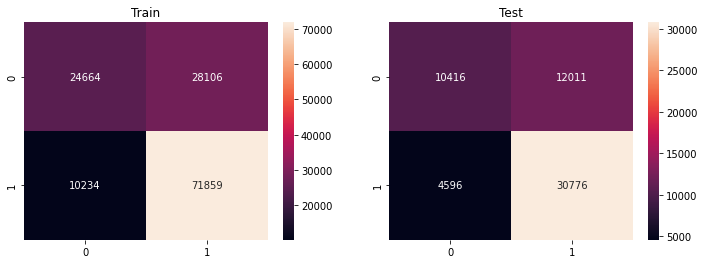

In [10]:
evaluate(y_test, y_pred_forest2, y_train, y_pred_forest2_train)

In [11]:
f1_score(y_test, y_pred_forest2)

0.7875228700469555

In [12]:
roc_auc_score(y_test, y_pred_forest2)

0.6672534515731215

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.756


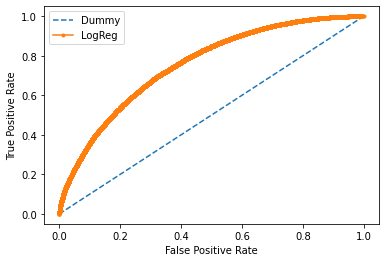

In [30]:
# predict probabilities
lr_probs = forest2.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# generate a no skill prediction (majority class) (does the same as the dummy classifier)
ns_probs = [1 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LogReg')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic Regression: f1=0.788 auc=0.814


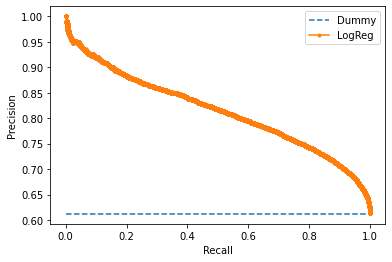

In [35]:
# precision-recall curve and f1

# predict class values
yhat = y_pred_forest2
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)


# plot the precision-recall curve for the model
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Dummy')
plt.plot(lr_recall, lr_precision, marker='.', label='LogReg')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show();

## Error analysis

In [13]:
error_df = pd.read_csv("data/df_preprocessed_log.csv")

In [14]:
error_df.head()

,country,state,delta_dead_laun,category,launch_day,launch_hour,name_len,blurb_len,goal_usd_log
0,US,1,720.0,games,3,19,23,125,6.907755
1,US,1,720.0,music,0,7,51,108,9.615805
2,GB,0,1439.0,games,3,19,34,133,9.479141
3,US,1,720.0,publishing,0,21,40,121,7.937375
4,US,1,720.0,music,3,4,31,134,8.160518


In [15]:
X2 = error_df.drop('state', axis=1)
y2 = error_df['state']

In [16]:
# split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42, test_size=0.3)

In [17]:
features = pd.DataFrame(X_test2)

In [18]:
features = features.reset_index()

In [19]:
state = y_test2.reset_index()

In [20]:
state_pred = pd.DataFrame(y_pred_forest2)

In [21]:
df_error = pd.concat([features, state_pred, state], axis=1)

In [22]:
df_error.rename(columns={0: 'state_pred'}, inplace=True)

In [23]:
positives = df_error.query('state_pred == 1')

In [24]:
negatives = df_error.query('state_pred == 0')

In [25]:
positives.head()

,index,country,delta_dead_laun,category,launch_day,launch_hour,name_len,blurb_len,goal_usd_log,state_pred,index,state
0,9463,US,1342.0,art,1,23,27,124,6.802395,1,9463,1
2,118784,GB,720.0,film & video,2,15,7,73,7.582021,1,118784,1
3,70,US,720.0,music,1,16,31,88,8.006368,1,70,1
4,166535,US,720.0,fashion,2,23,45,128,4.605170,1,166535,1
5,69288,US,720.0,art,2,4,46,98,7.696213,1,69288,0


In [26]:
negatives.head()

,index,country,delta_dead_laun,category,launch_day,launch_hour,name_len,blurb_len,goal_usd_log,state_pred,index,state
1,168793,GB,683.0,technology,4,10,27,124,8.288293,0,168793,0
6,86324,US,801.0,technology,1,18,55,135,11.652687,0,86324,1
8,149052,US,720.0,food,2,0,38,72,9.615805,0,149052,0
14,66472,US,1079.0,publishing,6,20,16,122,10.308953,0,66472,1
15,73284,US,720.0,crafts,0,19,27,123,7.600902,0,73284,0


<AxesSubplot:xlabel='category', ylabel='Count'>

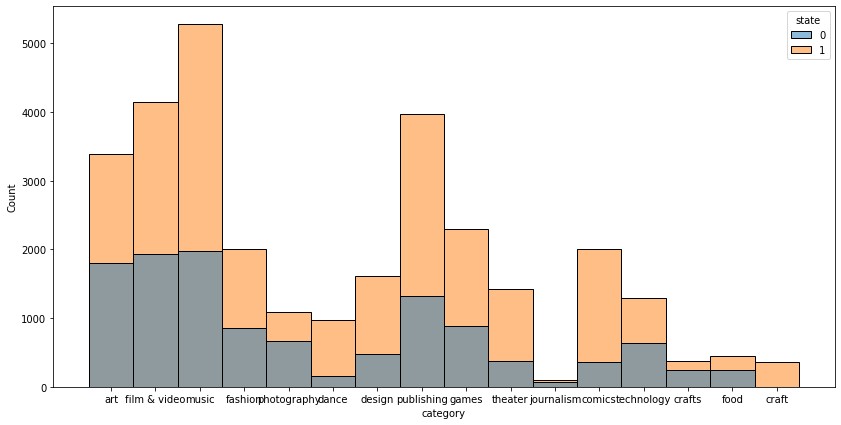

In [58]:
# plot category for false positives and true positives
plt.figure(figsize=(14, 7))
sns.histplot(x='category', data=positives, hue='state')

<AxesSubplot:xlabel='category', ylabel='Count'>

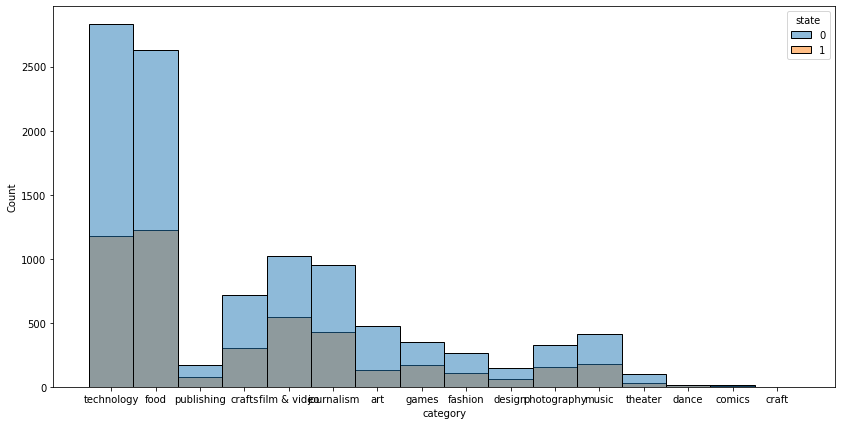

In [59]:
# plot category for false negatives and true negatives
plt.figure(figsize=(14, 7))
sns.histplot(x='category', data=negatives, hue='state')

<AxesSubplot:xlabel='goal_usd_log', ylabel='Count'>

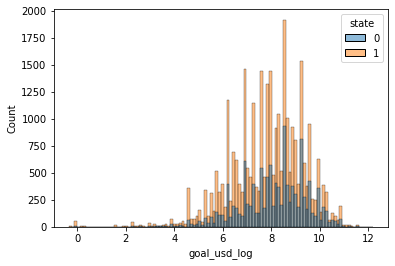

In [38]:
# plot goal in usd for false positives and true positives
sns.histplot(x='goal_usd_log', data=positives, hue='state')

<AxesSubplot:xlabel='goal_usd_log', ylabel='Count'>

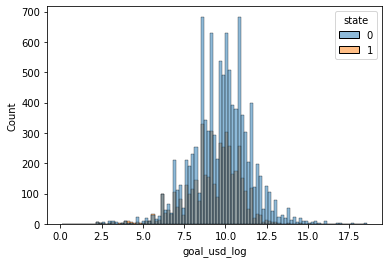

In [39]:
# plot goal in usd for false negatives and true negatives
sns.histplot(x='goal_usd_log', data=negatives, hue='state')

<AxesSubplot:xlabel='delta_dead_laun', ylabel='Count'>

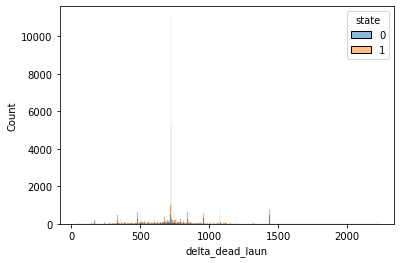

In [40]:
# plot time for false positives and true positives
sns.histplot(x='delta_dead_laun', data=positives, hue='state')

<AxesSubplot:xlabel='delta_dead_laun', ylabel='Count'>

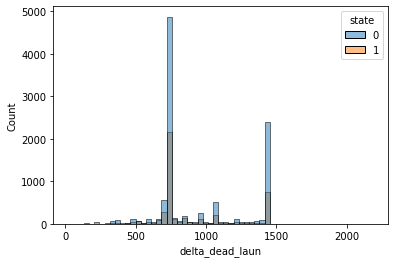

In [41]:
# plot time for false negatives
sns.histplot(x='delta_dead_laun', data=negatives, hue='state')

<AxesSubplot:xlabel='country', ylabel='Count'>

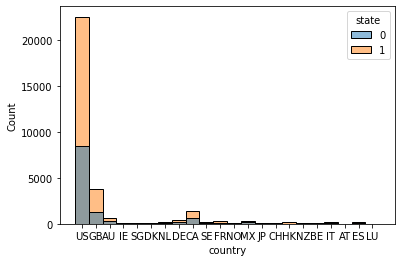

In [42]:
# plot country for false positives and true positives
sns.histplot(x='country', data=positives, hue='state')

<AxesSubplot:xlabel='name_len', ylabel='Count'>

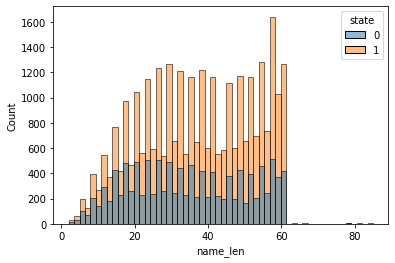

In [43]:
# plot name length for false positives and true positives
sns.histplot(x='name_len', data=positives, hue='state')

<AxesSubplot:xlabel='name_len', ylabel='Count'>

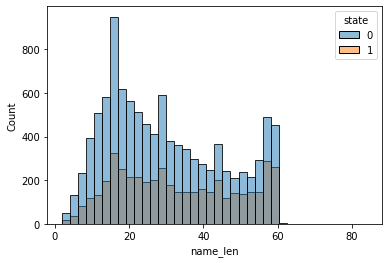

In [44]:
# plot name length for false negatives and true negatives
sns.histplot(x='name_len', data=negatives, hue='state')

<AxesSubplot:xlabel='blurb_len', ylabel='Count'>

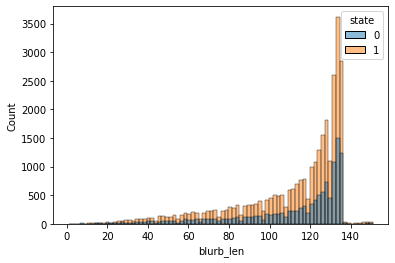

In [45]:
# plot blurb length for false positives and true positives
sns.histplot(x='blurb_len', data=positives, hue='state')

<AxesSubplot:xlabel='blurb_len', ylabel='Count'>

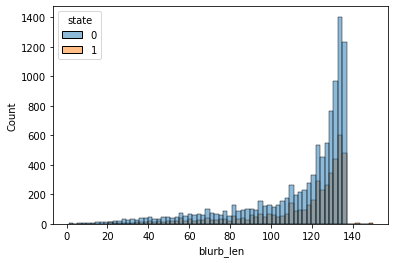

In [46]:
# plot blurb length for false negatives and true negatives
sns.histplot(x='blurb_len', data=negatives, hue='state')

<AxesSubplot:xlabel='launch_day', ylabel='Count'>

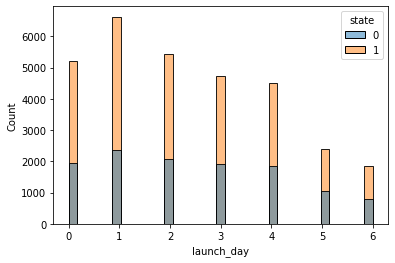

In [47]:
# plot launch day for false positives and true positives
sns.histplot(x='launch_day', data=positives, hue='state')

<AxesSubplot:xlabel='launch_day', ylabel='Count'>

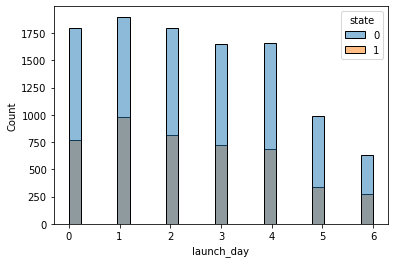

In [48]:
# plot launch day for false negatives and true negatives
sns.histplot(x='launch_day', data=negatives, hue='state')

<AxesSubplot:xlabel='launch_hour', ylabel='Count'>

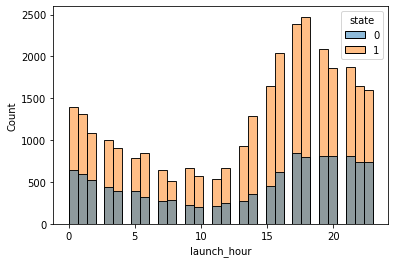

In [49]:
# plot launch day for false positives and true positives
sns.histplot(x='launch_hour', data=positives, hue='state')

<AxesSubplot:xlabel='launch_hour', ylabel='Count'>

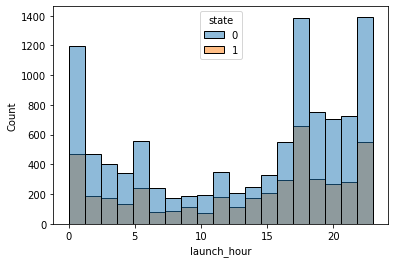

In [50]:
# plot launch day for false negatives and true negatives
sns.histplot(x='launch_hour', data=negatives, hue='state')

In [52]:
# look at random sample of 20 true positives and false positives
print(positives.sample(n=20))
#print(FP.sample(n=20))

        index country  delta_dead_laun      category  launch_day  launch_hour  \
25825  124991      US            720.0        crafts           4           17   
55588   66282      HK            720.0    technology           0           11   
5357   182304      US            336.0  film & video           1            5   
25810  161743      US           1440.0         music           2           23   
7050   178992      US            841.0         games           3           18   
29286   24708      AU            696.0        comics           4            2   
12119   30404      US            663.0         games           5            5   
1540    65743      US            720.0  film & video           1           20   
55337   20876      US            720.0    publishing           3           17   
48286   98994      SE            720.0         games           1           14   
1047   151972      US            671.0         games           0           14   
932     51187      US       

In [79]:
X.columns

Index(['delta_dead_laun', 'launch_day', 'launch_hour', 'name_len', 'blurb_len',
       'goal_usd_log', 'AU', 'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR', 'GB',
       'HK', 'IE', 'IT', 'JP', 'LU', 'MX', 'NL', 'NO', 'NZ', 'SE', 'SG', 'US',
       'comics', 'craft', 'crafts', 'dance', 'design', 'fashion',
       'film & video', 'food', 'games', 'journalism', 'music', 'photography',
       'publishing', 'technology', 'theater'],
      dtype='object')

<BarContainer object of 42 artists>

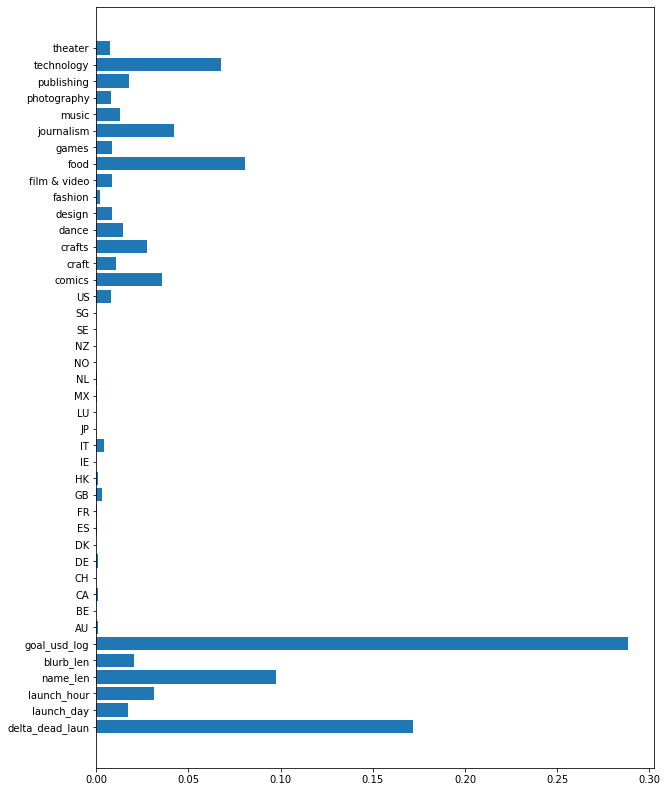

In [82]:
plt.figure(figsize=(10, 14))
plt.barh(X.columns, forest2.feature_importances_)